## Import Statements

In [1]:
import pandas as pd
import numpy as np

from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(10, 7)})


## .mat →  Python Dictionary

In [2]:
mat = loadmat("z2-22-18 p94 rd1 R1d Solution C Blockers.mat") # creates a dictionary from .mat file

del mat['__header__'] # removes unnecesary values from mat dictionary
del mat['__version__']
del mat['__globals__']

for key in list(mat.keys()): 
    # Iterates through mat and removes empty arrays (i.e channels without any data).
    if mat[key].shape == (0,3):  
        del mat[key]

## Python Dictionary → DataFrame

In [3]:
total_channel_table = pd.DataFrame(columns=[0,1,2])
for key in mat:
    total_channel_table = pd.concat([total_channel_table, pd.DataFrame(mat[key])])

total_channel_table = total_channel_table.rename(columns={0:"timestamp", 1:"unit", 2:"channel"})

In [4]:
total_channel_table

,timestamp,unit,channel
0,1.33445,1.0,1.0
1,1.40795,1.0,1.0
2,1.46545,1.0,1.0
3,1.50160,1.0,1.0
4,1.51155,1.0,1.0
...,...,...,...
1102,106.33545,2.0,59.0
1103,106.39735,2.0,59.0
1104,106.45670,2.0,59.0
1105,106.51720,2.0,59.0


## Parsing Trigger Times and Producing Time Intervals

In [5]:
trigger_table = pd.read_csv("z2-22-18 p94 rd1 R1d Solution C Blockers.txt", sep="\t", skiprows=[0, 3])
trigger_table.columns = trigger_table.columns.str.rstrip()
raw_trigger_times = trigger_table["Event Time"].values

In [6]:
parsed_trigger_times = np.array([])
for i in range(len(raw_trigger_times)):
    if raw_trigger_times[i] > (raw_trigger_times[i-1]+4):
        parsed_trigger_times = np.append(parsed_trigger_times, np.array([raw_trigger_times[i-1]/1000, raw_trigger_times[i]/1000]))
        
offset_trigger_times = parsed_trigger_times-parsed_trigger_times[0]
display(offset_trigger_times)

array([  0.     ,   5.01875,  11.13575,  16.1546 ,  22.2716 ,  27.2904 ,
        33.4074 ,  38.42625,  44.56125,  49.578  ,  55.713  ,  60.7308 ,
        66.8658 ,  71.88065,  78.01565,  83.03435,  89.15135,  94.1702 ,
       100.2872 , 105.30605])

In [7]:
# total_channel_table.query("channel == 1 & unit == 1")["timestamp"].to_numpy()

total_channel_table["absolute unit"] = np.nan
total_channel_table.astype({'unit': int, "channel": int})

total_channel_table

,timestamp,unit,channel,absolute unit
0,1.33445,1.0,1.0,NaN
1,1.40795,1.0,1.0,NaN
2,1.46545,1.0,1.0,NaN
3,1.50160,1.0,1.0,NaN
4,1.51155,1.0,1.0,NaN
...,...,...,...,...
1102,106.33545,2.0,59.0,NaN
1103,106.39735,2.0,59.0,NaN
1104,106.45670,2.0,59.0,NaN
1105,106.51720,2.0,59.0,NaN


In [8]:
dark_ranges = []
light_ranges = []

for i in range(0, len(offset_trigger_times), 2):
    light_ranges.append((offset_trigger_times[i], offset_trigger_times[i+1]))
    
for i in range(1, len(offset_trigger_times)-1, 2):
    dark_ranges.append((offset_trigger_times[i], offset_trigger_times[i+1]))

## Assigning Indices for Each Unit 

In [9]:
unit_dict = {}
abs_unit = 1

for i in range(len(total_channel_table)):
    curr = total_channel_table.iloc[i]["channel"]+(total_channel_table.iloc[i]["unit"]/10)#(total_channel_table.iloc[i]["channel"], total_channel_table.iloc[i]["unit"])
    print(curr)
    #curr = "{}-{}".format(total_channel_table.iloc[i]["channel"], total_channel_table.iloc[i]["unit"])
    if curr not in unit_dict:
        unit_dict[curr] = abs_unit
        total_channel_table["absolute unit"].iloc[i] = abs_unit
        abs_unit += 1
    else:
        total_channel_table["absolute unit"].iloc[i] = unit_dict[curr]
        

1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1
1.1


10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1
10.1


14.1
14.2
14.2
14.2
14.2
14.1
14.2
14.2
14.2
14.1
14.2
14.2
14.1
14.1
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.2
14.2
14.2
14.1
14.2
14.1
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.1
14.2
14.1
14.1
14.1
14.1
14.2
14.1
14.1
14.1
14.2
14.2
14.1
14.1
14.1
14.1
14.1
14.1
14.1
14.2
14.2
14.2
14.1
14.2
14.1
14.1
14.1
14.2
14.1
14.2
14.1
14.1
14.1
14.1
14.2
14.2
14.2
14.1
14.2
14.2
14.2
14.1
14.2
14.2
14.1
14.1
14.2
14.2
14.2
14.2
14.2
14.2
14.2
14.1
14.2
14.2
14.2
14.2
14.2
14.2
14.2
14.2
14.1
14.2
14.1
14.2
14.2
14.2
14.2
14.2
14.2
14.1
14.2
14.1
14.1
14.2
14.2
14.1
14.2
14.2
14.2
14.2
14.2
14.1
14.2
14.2
14.1
14.2
14.2
14.2
14.2
14.2
14.2
14.2
14.1
14.2
14.1
14.2
14.2
14.1
14.2
14.1
14.2
14.2
14.2
14.1
14.2
14.1
14.1
14.2
14.2
14.1
14.2
14.2
14.2
14.1
14.1
14.2
14.2
14.1
14.2
14.1
14.2
14.2
14.1
14.2
14.1
14.1
14.1
14.2
14.2
14.1
14.1
14.2
14.1
14.1
14.1
14.1
14.1
14.2
14.1
14.2
14.1
14.2
14.2
14.1
14.1
14.2
14.1
14.2


18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1
18.1


21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1
21.1


24.1
24.1
24.2
24.1
24.1
24.1
24.2
24.2
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.2
24.2
24.2
24.1
24.1
24.1
24.2
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.2
24.2
24.1
24.1
24.1
24.2
24.2
24.2
24.1
24.2
24.2
24.1
24.1
24.1
24.1
24.1
24.2
24.2
24.1
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.2
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.2
24.2
24.1
24.2
24.2
24.1
24.1
24.1
24.2
24.1
24.2
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.2
24.1
24.2
24.2
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.2
24.1
24.2
24.1
24.1
24.1
24.1
24.1
24.1
24.1


25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.2
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.2
25.1
25.2
25.2
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.2
25.2
25.1
25.1
25.1
25.2
25.1
25.1
25.2
25.1
25.2
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.2
25.1
25.2
25.2
25.1
25.2
25.2
25.1
25.1
25.2
25.1
25.1
25.1
25.2
25.1
25.2
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.1
25.2
25.1
25.1
25.1
25.1
25.2
25.2
25.1
25.1
25.1
25.1
25.1
25.1


26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.1
26.2
26.2
26.1
26.2
26.2
26.2
26.2
26.2
26.1
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.1
26.1
26.2
26.2
26.1
26.2
26.1
26.2
26.2
26.2
26.1
26.1
26.2
26.1
26.2
26.1
26.2
26.1
26.2
26.1
26.1
26.1
26.1
26.1
26.2
26.2
26.2
26.1
26.1
26.2
26.2
26.2
26.2
26.1
26.1
26.2
26.1
26.2
26.1
26.2
26.2
26.1
26.2
26.1
26.1
26.1
26.1
26.1
26.2
26.1
26.1
26.2
26.1
26.2
26.2
26.1
26.1
26.1
26.2
26.1
26.2
26.1
26.2
26.1
26.1
26.2
26.1
26.2
26.2
26.1
26.2
26.1
26.1
26.2
26.2
26.1
26.2
26.2
26.1
26.1
26.2
26.1
26.2
26.2
26.2
26.2
26.1
26.1
26.2
26.2
26.2
26.1
26.2
26.2
26.1
26.2
26.2
26.2
26.2
26.1
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.1
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2
26.2


28.2
28.2
28.2
28.1
28.2
28.2
28.1
28.1
28.2
28.2
28.1
28.1
28.2
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.2
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.2
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.2
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.2
28.1
28.2
28.2
28.1
28.2
28.1
28.1
28.1
28.2
28.1
28.1
28.1
28.1
28.2
28.2
28.1
28.1
28.2
28.1
28.2


30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.2
30.1
30.2
30.1
30.2
30.1
30.1
30.1
30.1
30.2
30.1
30.1
30.2
30.1
30.2
30.2
30.1
30.1
30.1
30.1
30.2
30.2
30.1
30.2
30.1
30.1
30.1
30.2
30.2
30.1
30.2
30.1
30.2
30.1
30.2
30.2
30.1
30.1
30.2
30.1
30.1
30.2
30.1
30.2
30.2
30.1
30.2
30.2
30.1
30.2
30.1
30.2
30.2
30.2
30.1
30.2
30.1
30.1
30.2
30.1
30.2
30.2
30.2
30.2
30.2
30.2
30.2
30.1
30.2
30.1
30.2
30.2
30.2
30.2
30.2
30.1
30.2
30.2
30.2
30.1
30.2
30.2
30.2
30.2
30.2
30.2
30.1
30.2
30.1
30.2
30.2
30.2
30.2
30.2
30.2
30.1
30.2
30.2
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.1
30.2
30.1
30.1
30.1
30.1
30.2
30.1
30.2
30.1
30.1
30.1
30.2
30.1
30.1
30.2
30.2
30.1
30.1
30.2
30.1
30.1
30.2
30.2
30.2
30.1
30.2
30.2
30.2
30.1
30.2
30.1
30.2
30.1
30.2
30.2
30.1
30.2
30.2
30.2
30.2
30.2
30.1
30.1
30.1
30.1
30.2
30.1
30.1
30.2
30.2
30.1
30.1
30.2
30.2
30.2
30.1
30.2
30.1
30.1
30.2
30.1
30.2
30.1
30.2
30.2
30.1
30.2
30.1
30.1
30.2
30.1
30.2
30.1


31.1
31.2
31.1
31.2
31.1
31.2
31.2
31.2
31.2
31.2
31.1
31.1
31.2
31.2
31.1
31.2
31.1
31.1
31.2
31.2
31.1
31.1
31.2
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.2
31.2
31.2
31.2
31.1
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.2
31.2
31.1
31.1
31.2
31.2
31.2
31.1
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.1
31.1
31.1
31.1
31.2
31.1
31.2
31.2
31.2
31.1
31.1
31.1
31.1
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.1
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.1
31.2
31.2
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.1
31.1
31.1
31.1
31.1
31.2
31.1
31.1
31.2
31.2
31.1
31.1
31.1
31.2
31.1
31.2
31.1
31.2
31.1
31.1
31.2
31.1
31.1
31.2
31.1
31.2
31.1
31.1
31.2
31.2
31.2
31.1
31.2
31.1
31.2
31.1
31.1
31.2
31.1


32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1
32.1


38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.2
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.2
38.2
38.1
38.2
38.1
38.1
38.1
38.1
38.2
38.2
38.1
38.1
38.2
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.2
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.2
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1
38.1


40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1
40.1


45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1


47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1
47.1


49.1
49.1
49.1
49.1
49.2
49.1
49.2
49.2
49.1
49.2
49.1
49.1
49.2
49.1
49.2
49.1
49.1
49.1
49.1
49.1
49.1
49.1
49.2
49.2
49.1
49.2
49.1
49.1
49.1
49.1
49.1
49.1
49.1
49.1
49.2
49.1
49.2
49.1
49.2
49.2
49.1
49.2
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.2
49.2
49.1
49.2
49.1
49.1
49.2
49.2
49.1
49.1
49.2
49.1
49.1
49.1
49.2
49.1
49.2
49.2
49.2
49.2
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.1
49.1
49.1
49.2
49.2
49.2
49.1
49.1
49.2
49.1
49.2
49.2
49.1
49.2
49.2
49.1
49.2
49.1
49.2
49.2
49.1
49.1
49.1
49.1
49.2
49.1
49.2
49.1
49.1
49.1
49.1
49.2
49.1
49.1
49.1
49.2
49.1
49.2
49.1
49.2
49.1
49.1
49.2
49.1
49.2
49.2
49.1
49.1
49.2
49.1
49.1
49.1
49.1
49.2
49.2
49.1
49.1
49.2
49.1
49.1
49.1
49.1
49.1
49.1
49.1
49.2
49.1
49.1
49.1
49.2
49.2
49.1
49.2
49.2
49.1
49.1
49.1
49.2
49.2
49.1
49.1
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.2
49.2
49.2
49.2
49.1
49.2
49.2
49.1
49.1
49.2
49.1
49.1
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.1
49.2
49.2
49.1
49.2
49.1
49.2
49.1


51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1
51.1


52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
52.1
53.1
53.1
53.1
53.1
53.1
53.1
53.2
53.1
53.1
53.1
53.1
53.2
53.2
53.1
53.2
53.1
53.2
53.2
53.1
53.2
53.2
53.1
53.2
53.1
53.1
53.2
53.1
53.2
53.2
53.1
53.1
53.2
53.1
53.2
53.1


59.1
59.2
59.2
59.1
59.2
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.1
59.1
59.1
59.1
59.1
59.1
59.2
59.2
59.2
59.1
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.1
59.2
59.1
59.1
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.1
59.1
59.1
59.2
59.1
59.2
59.1
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.1
59.2
59.1
59.1
59.2
59.2
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.1
59.2
59.1
59.1
59.2
59.2
59.2
59.1
59.2
59.2
59.1
59.2
59.1
59.1
59.2
59.1
59.2
59.1
59.2
59.2
59.2
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.1
59.2
59.1
59.2
59.2
59.1
59.2
59.2
59.2
59.2
59.1


In [10]:
grouped_channel_table = total_channel_table.groupby("absolute unit")
aggregate_channel_table = grouped_channel_table['timestamp'].apply(np.asarray).to_frame()

In [11]:
aggregate_channel_table["# spikes"] = np.nan

for i in range(len(aggregate_channel_table)):
    aggregate_channel_table["# spikes"].iloc[i] = len(aggregate_channel_table.iloc[i]["timestamp"])

aggregate_channel_table = aggregate_channel_table.sort_values(by=["# spikes"], ascending = False)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Building Raster Graph

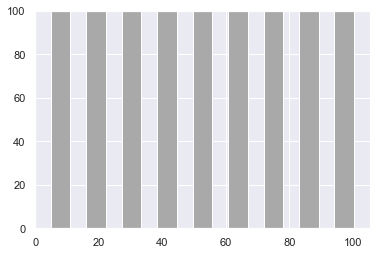

In [12]:
#grey/white bars

hist, ax = plt.subplots(1)
ax.set_xlim(0,offset_trigger_times[-1])
ax.set_ylim(0, 100)

for i in range(1, len(offset_trigger_times)-1, 2):
    width = offset_trigger_times[i+1] - offset_trigger_times[i]
    rectangle = patches.Rectangle([offset_trigger_times[i], 0], width, 100, facecolor = 'darkgrey')
    ax.add_patch(rectangle)

bin_width = 0.1

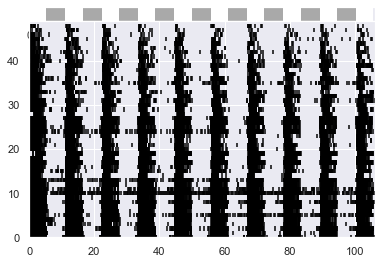

In [13]:
fig = plt.figure()
bars = fig.add_axes([0.1, 0.85, 0.8, 0.05], xlim = (0, 106), yticklabels=[])
raster = fig.add_axes([0.1, 0.1, 0.8, 0.75])

for i in range(1, len(offset_trigger_times)-1, 2):
    width = offset_trigger_times[i+1] - offset_trigger_times[i]
    rectangle = patches.Rectangle([offset_trigger_times[i], 0], width, 100, facecolor = 'darkgrey')
    bars.add_patch(rectangle)
    
for i in range(0, len(offset_trigger_times)-1, 2):
    width = offset_trigger_times[i+1] - offset_trigger_times[i]
    rectangle = patches.Rectangle([offset_trigger_times[i], 0], width, 100, facecolor = 'white')
    bars.add_patch(rectangle)

# Draw a spike raster plot
plt.eventplot(aggregate_channel_table["timestamp"]-parsed_trigger_times[0], color='black')     

# Set x and y limits
plt.xlim(0, 106)
plt.ylim(0, 49)

# Display the spike raster plot
plt.show()

## Total Spikes in Light and Dark Intervals

In [14]:
aggregate_channel_table['offset timestamp'] = aggregate_channel_table["timestamp"]-parsed_trigger_times[0]
total_channel_table['offset timestamp'] = total_channel_table["timestamp"]-parsed_trigger_times[0]

In [15]:
display(total_channel_table.head())
display(offset_trigger_times)

,timestamp,unit,channel,absolute unit,offset timestamp
0,1.33445,1.0,1.0,1.0,0.20045
1,1.40795,1.0,1.0,1.0,0.27395
2,1.46545,1.0,1.0,1.0,0.33145
3,1.50160,1.0,1.0,1.0,0.36760
4,1.51155,1.0,1.0,1.0,0.37755


array([  0.     ,   5.01875,  11.13575,  16.1546 ,  22.2716 ,  27.2904 ,
        33.4074 ,  38.42625,  44.56125,  49.578  ,  55.713  ,  60.7308 ,
        66.8658 ,  71.88065,  78.01565,  83.03435,  89.15135,  94.1702 ,
       100.2872 , 105.30605])

In [16]:
#total_channel_table['light on'] = True -> light on
#total_channel_table['light on'] = False -> light off

total_channel_table["light on"] = total_channel_table["offset timestamp"].apply(lambda x: any(lower<x<upper for (lower,upper) in light_ranges))

In [17]:
pos_timestamp_channel_table = total_channel_table.loc[total_channel_table["offset timestamp"] > 0]

In [18]:
display(pos_timestamp_channel_table.groupby("light on").size())
display(len(pos_timestamp_channel_table))

light on
False     1312
True     34213
dtype: int64

35525

In [19]:
pos_timestamp_channel_table.loc[pos_timestamp_channel_table["absolute unit"] == 3].groupby("light on").size()

light on
False    215
True     879
dtype: int64

## Calculating PIs and PI Distribution

$photoswitching\ index\ (PI) = \dfrac{\left |(\#\ spikes\ during\ light\ intervals)-(\#\ spikes\ during\ dark\ intervals)\right|}{(total\ \#\ of \ spikes)}$

In [20]:
spikes_per_periods = pos_timestamp_channel_table.groupby("light on").size()

def pi_calc(unit):
    # plug in absolute unit number to calculate photoswitching index (PI) for that (absolute) unit
    # plug in "all" to calculate PI for the whole tissue
    if unit == "all":
        data = pos_timestamp_channel_table.groupby("light on").size()
    else:
        data = pos_timestamp_channel_table.loc[pos_timestamp_channel_table["absolute unit"] == int(unit)].groupby("light on").size()
    index = pos_timestamp_channel_table.loc[pos_timestamp_channel_table["absolute unit"] == 3].groupby("light on").size().index
    try:
        light_on = data[True]
    except KeyError:
        light_on = 0
    try:
        light_off = data[False]
    except KeyError:
        light_off = 0
    return abs(light_on-light_off)/(light_on+light_off)

In [21]:
pi_table = pd.DataFrame(data={"absolute unit" : pos_timestamp_channel_table["absolute unit"].unique(),
                              "PI" : map(pi_calc, pos_timestamp_channel_table["absolute unit"].unique())
                             }
                       ).set_index("absolute unit")

pi_table

,PI
absolute unit,
1.0,0.980831
3.0,0.606947
2.0,0.988996
4.0,0.883929
5.0,0.982935
6.0,0.968366
7.0,0.988060
8.0,0.973526
9.0,0.957971


Text(0.5, 1.0, 'PI Distribution Across all Units')

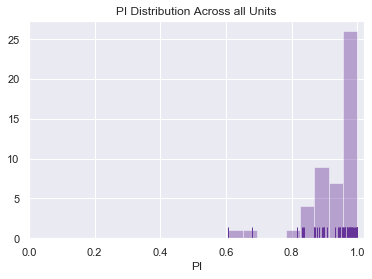

In [22]:
sns.distplot(pi_table["PI"], kde = False, rug=True,color="rebeccapurple", hist_kws=dict(edgecolor="white", linewidth=1))
plt.xlim(0)
plt.title("PI Distribution Across all Units")

## Spike Histogram

In [23]:
total_channel_table.head()

,timestamp,unit,channel,absolute unit,offset timestamp,light on
0,1.33445,1.0,1.0,1.0,0.20045,True
1,1.40795,1.0,1.0,1.0,0.27395,True
2,1.46545,1.0,1.0,1.0,0.33145,True
3,1.50160,1.0,1.0,1.0,0.36760,True
4,1.51155,1.0,1.0,1.0,0.37755,True


(0, 110.775)

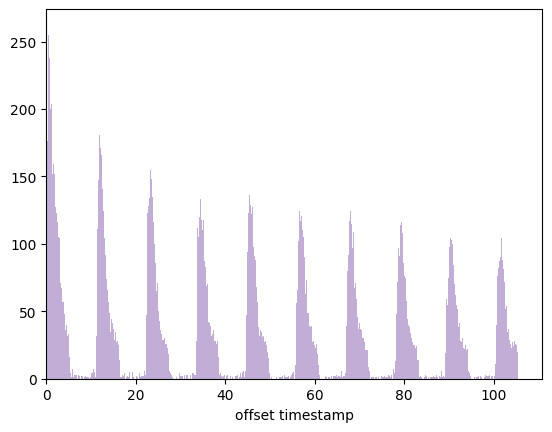

In [24]:
plt.style.use("default")
sns.distplot(pos_timestamp_channel_table["offset timestamp"],  bins = np.arange(0, pos_timestamp_channel_table["offset timestamp"].iat[-1], 0.1), kde=False, rug=False, color="rebeccapurple")
plt.xlim(0)

In [25]:
def percentile_range(interval, bottom_percentile, top_percentile):
    '''
    interval -- a tuple representing a light or dark interval, with interval[0] being the beginning of the interval,
                and interval[1] being the end of the interval, inclusive
    bottom_percentile -- a float representing the percentile of the original interval at which your resultant interval should begin
    top_percentile -- a float representing the percentile of the original interval at which your resultant interval should end
    '''
    total_range = interval[1]-interval[0]
    return (interval[0]+(bottom_percentile*total_range), interval[1]-((1-top_percentile)*total_range))
    

def pi_calc_percentile(unit, bottom_percentile, top_percentile):
    new_ranges = list(map((lambda x: percentile_range(x, bottom_percentile, top_percentile)), light_ranges))
    temp_table = pos_timestamp_channel_table
    temp_table["in_interval"]=pos_timestamp_channel_table["offset timestamp"].apply(lambda x: any(lower<x<upper for (lower,upper) in new_ranges))
    temp_table["in_dark"]=pos_timestamp_channel_table["offset timestamp"].apply(lambda x: any(lower<x<upper for (lower,upper) in dark_ranges))

    
    if unit == "all":
        interval_data = temp_table.groupby("in_interval").size()
        dark_data = temp_table.groupby("in_dark").size()
    else:
        interval_data = temp_table.loc[temp_table["absolute unit"] == int(unit)].groupby("in_interval").size()
        dark_data = temp_table.loc[temp_table["absolute unit"] == int(unit)].groupby("in_dark").size()
    #index = temp_table.loc[temp_table["absolute unit"] == 3].groupby("in_interval").size().index
    try:
        inside_interval = interval_data[True]
    except KeyError:
        inside_interval = 0
    try:
        outside_interval = dark_data[True]
    except KeyError:
        outside_interval = 0
    return abs(inside_interval-outside_interval)/(inside_interval+outside_interval)

In [61]:
pi_calc_percentile("all", 0, 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0.9338665460814516

In [26]:
pi_calc_percentile(3, 0, 0.25)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0.14782608695652175

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Text(0, 0.5, 'PI')

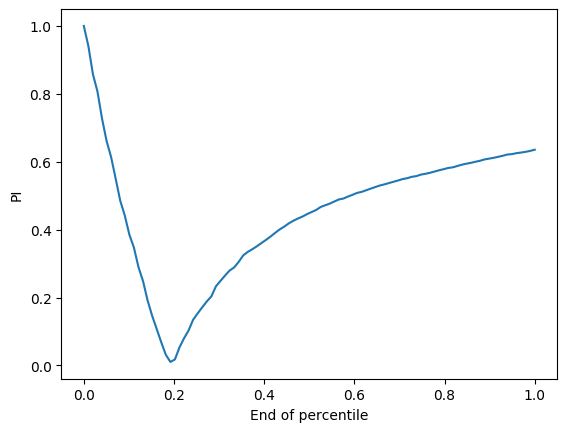

In [38]:
# time = np.linspace(0,1,num=50)
x = np.linspace(0,1,num=100)
y = list(map(lambda x: pi_calc_percentile(3,0,x), x))


plt.plot(x, y)
plt.xlabel("End of percentile")
plt.ylabel("PI")
